In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading data and pre processing
train_dir = '/content/drive/MyDrive/Colab Notebooks/603/training'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/603/testing'
test_dir = '/content/drive/MyDrive/Colab Notebooks/603/testing'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='categorical')


Found 9288 images belonging to 8 classes.
Found 2020 images belonging to 8 classes.
Found 2020 images belonging to 8 classes.


In [ ]:
#CNN definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax') # 8 classes - 4 for brain, 4 for lung
])


In [ ]:
#Compling
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
#training
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # depends on your dataset
    epochs=15,
    validation_data=validation_generator,
    validation_steps=15)  # depends on your dataset


Epoch 1/15
100/100 [==============================] - 323s 3s/step - loss: 0.1261 - accuracy: 0.9560 - val_loss: 0.6890 - val_accuracy: 0.8533
Epoch 2/15
100/100 [==============================] - 345s 3s/step - loss: 0.1115 - accuracy: 0.9610 - val_loss: 0.9845 - val_accuracy: 0.8067
Epoch 3/15
100/100 [==============================] - 338s 3s/step - loss: 0.1199 - accuracy: 0.9615 - val_loss: 0.8583 - val_accuracy: 0.8633
Epoch 4/15
100/100 [==============================] - 320s 3s/step - loss: 0.1132 - accuracy: 0.9620 - val_loss: 0.8126 - val_accuracy: 0.8700
Epoch 5/15
100/100 [==============================] - 312s 3s/step - loss: 0.1037 - accuracy: 0.9640 - val_loss: 0.8207 - val_accuracy: 0.8933
Epoch 6/15
100/100 [==============================] - 313s 3s/step - loss: 0.0772 - accuracy: 0.9730 - val_loss: 1.1981 - val_accuracy: 0.8700
Epoch 7/15
100/100 [==============================] - 310s 3s/step - loss: 0.0948 - accuracy: 0.9678 - val_loss: 1.0262 - val_accuracy: 0.8833

In [8]:
#evaluate
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)


41/41 [==============================] - 95s 2s/step - loss: 0.8041 - accuracy: 0.9045
Test accuracy: 0.9044554233551025


In [9]:
#model prediction
image_path='/content/drive/MyDrive/Colab Notebooks/603/testing/no_tumor/Te-noTr_0004.jpg'
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Example usage
predicted_class = predict_image(image_path)
print(predicted_class)

1/1 [==============================] - 0s 372ms/step
[4]


In [10]:
#predicting the output class
if predicted_class[0] == 0:
  print("Adeno Carcinoma was detected in the lungs")
elif predicted_class[0] == 1:
  print("Glioma Tumora was detected in the brain")
elif predicted_class[0] == 2:
  print("Large Cell Carcinoma was detected in the lungs")
elif predicted_class[0] == 3:
  print("Meningioma Tumor was detected in the brain")
elif predicted_class[0] == 4:
  print("No tumor was detected in the brain")
elif predicted_class[0] == 5:
  print("No tumor was detected in the brain")
elif predicted_class[0] == 6:
  print("Pituitary Tumor was detected in the brain")
elif predicted_class[0] == 7:
  print("Pituitary Tumor was detected in the brain")

No tumor was detected in the brain


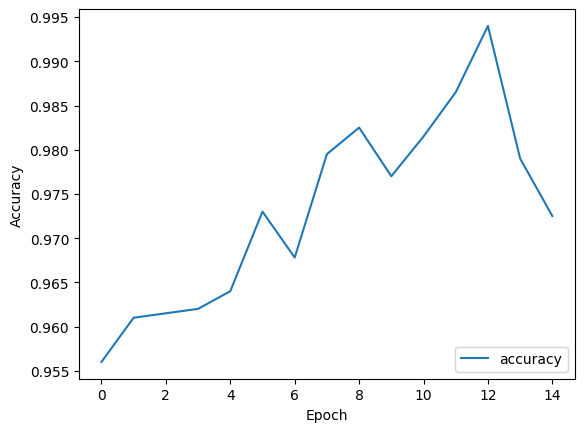

In [11]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()